# PART 1 - THE PROJECT'S GOALS:
In this project, I will analyze a database of [Israel_Real_Estate_Market] which I created in SQL.
I intend to answer the following questions:

### 1. Which of the property's properties most affect its price?
### 2. What are the five cities where real estate prices are the highest? And is there a connection to their socioeconomic ranking?
### 3. How have prices changed over the years?
### 4. Consumer behavior - Is there a connection between the profession of the customer and the city where he purchases a property?
### 5. Investment analysis - Is there a significant difference in the annual return percentages in certain cities?

I will organize, sort and group the data, and then I will visualize my findings in order to make the data more understandable and accessible.

I will use Python, with the help of Pandas, Matplotlib and Seaborn libraries.

# PARTS 2 + 3 - PREPARING THE DATA FOR ANALYSIS:

### 1. Load the data into Pandas DataFrame
### 2. Describe how the database is built, and what the columns and values mean
### 3. Identify and handle abonrmal or null values
### 4. Perform transformations and convert the data to different datatype if necessary

In [1]:
#Import of various libraries that are commonly used for data analysis, visualization, and database interactions in Python:
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import datetime as dt
import pyodbc

In [2]:
#Defining the connection to the database in SQL:

conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      r'Server=LAPTOP-LN5F27G9\SQLEXPRESS;'
                      'Database=Israel_Real_Estate_Market;'
                      'Trusted_connection=yes;')

In [3]:
#Importing all the tables in the database and saving them in variables with appropriate names:

Cities = pd.read_sql("select * from Cities",conn)
Customers = pd.read_sql("select * from Customers",conn)
ProperyDetails = pd.read_sql("select * from Property_Details",conn)
Transactions = pd.read_sql("select * from Transactions",conn)

C:\Users\Alon\AppData\Local\Temp\ipykernel_14868\2466572994.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Cities = pd.read_sql("select * from Cities",conn)
C:\Users\Alon\AppData\Local\Temp\ipykernel_14868\2466572994.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Customers = pd.read_sql("select * from Customers",conn)
C:\Users\Alon\AppData\Local\Temp\ipykernel_14868\2466572994.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ProperyDetails = pd.read_sql("select * from Property_Details",conn)
C:\Users\Alon\AppDa

In [4]:
#Checking general information about the table:

Cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CityID                20 non-null     int64  
 1   CityName              20 non-null     object 
 2   Region                20 non-null     object 
 3   SocioEconomicIndex    20 non-null     int64  
 4   TotalPopulation       20 non-null     int64  
 5   AveragePurchasePrice  20 non-null     float64
 6   AverageRentalPrice    20 non-null     float64
 7   AnnualReturn          20 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ KB


In [5]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  28 non-null     int64 
 1   FirstName   28 non-null     object
 2   LastName    28 non-null     object
 3   BirthDate   28 non-null     object
 4   Gender      28 non-null     object
 5   Profession  28 non-null     object
 6   Residence   28 non-null     object
 7   Religion    28 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.9+ KB


In [6]:
ProperyDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PropertyID          40 non-null     int64 
 1   Address             40 non-null     object
 2   Type                40 non-null     object
 3   Floor               40 non-null     int64 
 4   NumberOfRooms       40 non-null     int64 
 5   SquareMeter         40 non-null     int64 
 6   YearOfConstruction  40 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.3+ KB


In [7]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    40 non-null     int64  
 1   CustomerID       40 non-null     int64  
 2   PropertyID       40 non-null     int64  
 3   CityName         40 non-null     object 
 4   TransactionDate  40 non-null     object 
 5   Price            40 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.0+ KB


In [8]:
#Viewing the first 5 rows from the table:

Cities.head()

,CityID,CityName,Region,SocioEconomicIndex,TotalPopulation,AveragePurchasePrice,AverageRentalPrice,AnnualReturn
0,1,Tel Aviv,Tel Aviv,8,494561,4580456.0,9300.0,2.23
1,2,Haifa,Haifa,7,295781,1474634.0,3800.0,2.83
2,3,Jerusalem,Jerusalem,4,1039481,2715856.0,6000.0,2.43
3,4,Beer Sheva,South,5,218302,1172675.0,2700.0,2.53
4,5,Eilat,South,5,57732,1896555.0,4050.0,2.35


In [9]:
Customers.head()

,CustomerID,FirstName,LastName,BirthDate,Gender,Profession,Residence,Religion
0,1,David,Levi,1980-05-12,Male,Engineer,Tel Aviv,Jewish
1,2,Maya,Cohen,1985-03-22,Female,Teacher,Haifa,Jewish
2,3,Yossi,Mizrahi,1975-11-05,Male,Doctor,Jerusalem,Jewish
3,4,Itamar,Goldberg,1983-08-14,Male,Lawyer,Rishon LeZion,Jewish
4,5,Rachel,Barak,1994-09-11,Female,Designer,Ashdod,Jewish


In [10]:
ProperyDetails.head()

,PropertyID,Address,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
0,1,Yaalom 6,Apartment,4,5,125,2021
1,2,Livne 7,Private,0,4,106,2008
2,3,Ben Gurion 4,Apartment,1,4,98,2007
3,4,Hatzabar 215,Apartment,0,3,49,1989
4,5,Shahaf 42,Private,0,4,81,1996


In [11]:
Transactions.head()

,TransactionID,CustomerID,PropertyID,CityName,TransactionDate,Price
0,1,27,36,Haifa,2022-07-10,720000.0
1,2,11,27,Bat Yam,2024-06-09,2050000.0
2,3,9,16,Herzliya,2024-11-11,3170000.0
3,4,4,40,Beer Sheva,2024-11-18,825000.0
4,5,12,3,Ramat Hasharon,2024-11-10,4000000.0


In [12]:
#Converting some of the data to a more appropriate datatype:

In [13]:
#Customers table:
Customers['BirthDate'] = pd.to_datetime(Customers['BirthDate'])

#Transactions table:
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])

In [14]:
#There are no NULL values in the tables so no data needs to be filled in

# PARTS 4 + 5 + 6 - DESCRIPTIVE STATISTICAL ANALYSIS, ADVANCED ANALYSIS and CREATING CHARTS:

### 1. Statistics view of the tables
### 2. Identifying extreme or unusual values
### 3. Analyzes according to different categories
### 4. Grouping data according to different dimensions
### 5. Analysis of trends over time
### 6. Creating charts

In [15]:
#Setting the display format for floats to show two decimals and commas as thousand separators. 
pd.options.display.float_format = '{:,.2f}'.format  
Cities.describe()

,CityID,SocioEconomicIndex,TotalPopulation,AveragePurchasePrice,AverageRentalPrice,AnnualReturn
count,20.00,20.00,20.00,20.00,20.00,20.00
mean,10.50,6.05,"166,305.55","2,386,903.65","5,460.00",2.55
std,5.92,1.85,"239,535.65","1,081,313.01","2,244.68",0.33
min,1.00,4.00,"5,698.00","1,104,612.00","2,700.00",1.98
25%,5.75,4.75,"44,352.75","1,532,540.75","3,675.00",2.33
50%,10.50,5.00,"74,912.00","2,077,536.50","4,950.00",2.50
75%,15.25,8.00,"220,959.25","3,216,412.50","7,112.50",2.72
max,20.00,9.00,"1,039,481.00","4,658,372.00","9,500.00",3.29


In [16]:
ProperyDetails.describe()

,PropertyID,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
count,40.00,40.00,40.00,40.00,40.00
mean,20.50,2.75,3.80,101.00,"1,993.38"
std,11.69,4.03,0.97,80.35,20.35
min,1.00,0.00,2.00,38.00,"1,950.00"
25%,10.75,0.75,3.00,62.50,"1,970.00"
50%,20.50,2.00,4.00,79.50,"1,996.00"
75%,30.25,3.00,4.00,110.75,"2,007.25"
max,40.00,23.00,6.00,533.00,"2,024.00"


In [17]:
Transactions.describe()

,TransactionID,CustomerID,PropertyID,TransactionDate,Price
count,40.00,40.00,40.00,40,40.00
mean,20.50,13.30,20.50,2023-06-26 07:48:00,"2,438,850.00"
min,1.00,1.00,1.00,2008-12-10 00:00:00,"450,000.00"
25%,10.75,6.75,10.75,2023-03-17 00:00:00,"1,190,000.00"
50%,20.50,12.50,20.50,2024-06-11 00:00:00,"2,015,000.00"
75%,30.25,20.00,30.25,2024-10-10 18:00:00,"3,207,500.00"
max,40.00,28.00,40.00,2024-11-18 00:00:00,"7,400,000.00"
std,11.69,8.22,11.69,NaN,"1,738,107.60"


In [18]:
#Additional analyzes by categories:

In [19]:
#Checking the distribution of the annual return among the different cities:

In [20]:
Cities.sort_values("AnnualReturn", ascending = False)

,CityID,CityName,Region,SocioEconomicIndex,TotalPopulation,AveragePurchasePrice,AverageRentalPrice,AnnualReturn
15,16,Tiberias,North,4,51869,"1,104,612.00","3,300.00",3.29
5,6,Mitzpe Ramon,South,4,5698,"1,135,016.00","3,000.00",3.17
18,19,Ashdod,South,5,228931,"1,884,847.00","4,900.00",2.86
1,2,Haifa,Haifa,7,295781,"1,474,634.00","3,800.00",2.83
17,18,Or Akiva,Haifa,4,25260,"1,990,763.00","5,000.00",2.76
8,9,Herzliya,Tel Aviv,8,109296,"3,454,284.00","8,900.00",2.71
19,20,Rishon LeZion,Center,6,259840,"2,288,955.00","5,500.00",2.64
16,17,Caesarea,Haifa,9,5818,"2,428,048.00","5,800.00",2.63
11,12,Hod Hasharon,Center,8,66208,"3,428,493.00","8,000.00",2.57
3,4,Beer Sheva,South,5,218302,"1,172,675.00","2,700.00",2.53


In [21]:
#Displayung the connection between the socio-economic index and the average rental price:

In [22]:
df = Cities[["SocioEconomicIndex", "AverageRentalPrice"]]

In [23]:
df

,SocioEconomicIndex,AverageRentalPrice
0,8,"9,300.00"
1,7,"3,800.00"
2,4,"6,000.00"
3,5,"2,700.00"
4,5,"4,050.00"
5,4,"3,000.00"
6,5,"4,700.00"
7,4,"4,300.00"
8,8,"8,900.00"
9,9,"9,500.00"


In [24]:
#Filtering unusual values from the table:
df = df.drop([1,2,16])

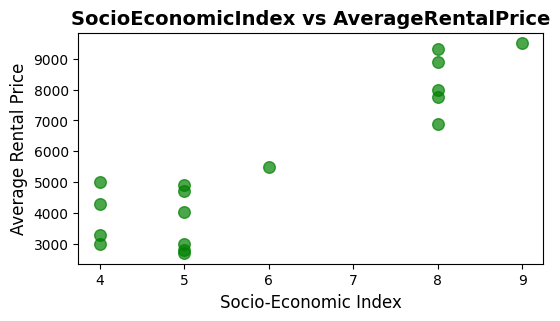

In [25]:
#Creating a scatter plot:
plt.figure(figsize=(6, 3))

#Choosing the color and size of the points:
plt.scatter(df['SocioEconomicIndex'], df['AverageRentalPrice'], color='green', alpha=0.7, s=70) 
plt.title("SocioEconomicIndex vs AverageRentalPrice", fontsize=14, weight='bold')
plt.xlabel("Socio-Economic Index", fontsize=12)
plt.ylabel("Average Rental Price", fontsize=12)
plt.show()

In [26]:
#Division of transactions according to Year Of Construction:

In [27]:
ProperyDetails.value_counts("YearOfConstruction")

YearOfConstruction
1970    9
2000    3
2021    2
1980    2
2023    2
1996    2
1998    2
2024    2
1991    1
1989    1
1985    1
1981    1
1950    1
1962    1
1992    1
1995    1
2005    1
2004    1
2001    1
2007    1
2019    1
2012    1
2008    1
2020    1
Name: count, dtype: int64

In [28]:
#The 10 most expensive transactions:

In [29]:
Transactions.sort_values("Price", ascending = False).head(10)

,TransactionID,CustomerID,PropertyID,CityName,TransactionDate,Price
31,32,15,33,Ramat Hasharon,2022-11-06,"7,400,000.00"
14,15,1,10,Hod Hasharon,2022-06-23,"7,150,000.00"
36,37,1,8,Or Akiva,2022-10-25,"6,300,000.00"
18,19,3,22,Caesarea,2024-01-15,"5,150,000.00"
4,5,12,3,Ramat Hasharon,2024-11-10,"4,000,000.00"
29,30,20,14,Tel Aviv,2024-11-06,"3,990,000.00"
34,35,12,34,Raanana,2023-08-09,"3,800,000.00"
16,17,20,1,Kfar Saba,2024-11-13,"3,750,000.00"
22,23,19,39,Eilat,2022-08-19,"3,650,000.00"
9,10,14,25,Raanana,2024-10-29,"3,230,000.00"


In [30]:
#The 10 cheapest transactions:

In [31]:
Transactions.sort_values("Price").head(10)

,TransactionID,CustomerID,PropertyID,CityName,TransactionDate,Price
11,12,10,29,Kiryat Shmona,2024-08-04,"450,000.00"
19,20,21,30,Haifa,2016-11-28,"530,000.00"
24,25,17,26,Mitzpe Ramon,2019-11-07,"625,000.00"
28,29,10,35,Kiryat Shmona,2023-04-02,"680,000.00"
0,1,27,36,Haifa,2022-07-10,"720,000.00"
13,14,26,32,Karmiel,2022-12-27,"750,000.00"
8,9,7,19,Mitzpe Ramon,2024-09-26,"825,000.00"
3,4,4,40,Beer Sheva,2024-11-18,"825,000.00"
39,40,2,21,Tiberias,2024-09-26,"899,000.00"
6,7,11,13,Herzliya,2023-11-15,"1,100,000.00"


In [32]:
#Join of Transactions and ProperyDetails tables:

In [33]:
tran_propdet = pd.merge(Transactions, ProperyDetails, on = "PropertyID")

In [34]:
tran_propdet.head()

,TransactionID,CustomerID,PropertyID,CityName,TransactionDate,Price,Address,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
0,1,27,36,Haifa,2022-07-10,"720,000.00",Hachshmal 53,Apartment,2,3,54,1950
1,2,11,27,Bat Yam,2024-06-09,"2,050,000.00",Arlozerov 81,Apartment,2,3,61,1970
2,3,9,16,Herzliya,2024-11-11,"3,170,000.00",Pinsker 13,Apartment,1,4,92,2001
3,4,4,40,Beer Sheva,2024-11-18,"825,000.00",Shaul Hamelech 4,Apartment,1,3,57,1995
4,5,12,3,Ramat Hasharon,2024-11-10,"4,000,000.00",Ben Gurion 4,Apartment,1,4,98,2007


In [35]:
#Deleting the irrelevant columns, sorting by price and selecting the 7 most expensive transactions:
top7_transactions = tran_propdet.drop(labels = ["CustomerID", "PropertyID"], axis=1).sort_values("Price", ascending = False).head(7)

In [36]:
top7_transactions

,TransactionID,CityName,TransactionDate,Price,Address,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
31,32,Ramat Hasharon,2022-11-06,"7,400,000.00",Lamerhav 1,Private,0,5,175,1985
14,15,Hod Hasharon,2022-06-23,"7,150,000.00",Akalton 18,Private,0,6,230,1991
36,37,Or Akiva,2022-10-25,"6,300,000.00",Havered 1,Apartment,9,5,173,2023
18,19,Caesarea,2024-01-15,"5,150,000.00",Livne 4,Private,0,4,139,1996
4,5,Ramat Hasharon,2024-11-10,"4,000,000.00",Ben Gurion 4,Apartment,1,4,98,2007
29,30,Tel Aviv,2024-11-06,"3,990,000.00",Hasolelim 1,Apartment,23,3,72,2024
34,35,Raanana,2023-08-09,"3,800,000.00",Hayovel 8,Private,0,4,120,1981


In [37]:
#Adding a "year" and "month" columns to Transactions table:

In [38]:
Transactions["Year"] = Transactions["TransactionDate"].dt.year
Transactions["Month"] = Transactions["TransactionDate"].dt.month

In [39]:
Transactions.head()

,TransactionID,CustomerID,PropertyID,CityName,TransactionDate,Price,Year,Month
0,1,27,36,Haifa,2022-07-10,"720,000.00",2022,7
1,2,11,27,Bat Yam,2024-06-09,"2,050,000.00",2024,6
2,3,9,16,Herzliya,2024-11-11,"3,170,000.00",2024,11
3,4,4,40,Beer Sheva,2024-11-18,"825,000.00",2024,11
4,5,12,3,Ramat Hasharon,2024-11-10,"4,000,000.00",2024,11


In [40]:
#How many transactions were made each year:

In [41]:
Transactions.groupby("Year")["Year"].count().to_frame()

,Year
Year,
2008,1
2016,1
2019,1
2022,6
2023,6
2024,25


In [42]:
#The division of transactions according to the months:

In [43]:
division_of_transactions = Transactions.value_counts("Month").to_frame()

In [44]:
division_of_transactions = division_of_transactions.sort_values("Month")

In [45]:
division_of_transactions

,count
Month,
1,1
2,1
3,1
4,3
5,1
6,3
7,3
8,4
9,4


In [46]:
#Creating a histogram graph showing the distribution of transactions throughout the year:

In [47]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

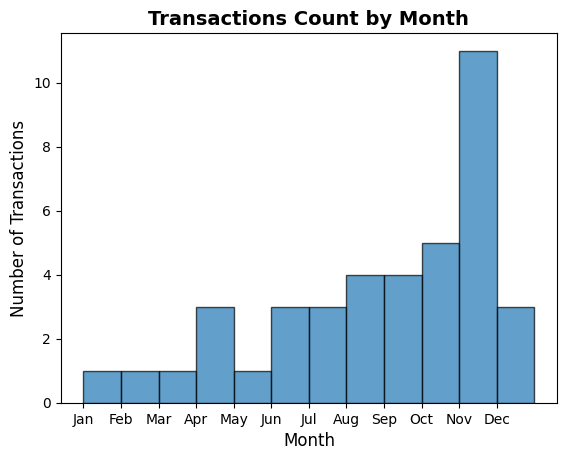

In [48]:
plt.hist(division_of_transactions.index, bins=range(1, 14), weights=division_of_transactions['count'], edgecolor='black', alpha=0.7)
plt.title("Transactions Count by Month", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(range(1, 13), months)
plt.show()

In [49]:
#The 3 oldest transactions:

In [50]:
Transactions.sort_values("TransactionDate").head(3)

,TransactionID,CustomerID,PropertyID,CityName,TransactionDate,Price,Year,Month
25,26,14,2,Caesarea,2008-12-10,"2,030,000.00",2008,12
19,20,21,30,Haifa,2016-11-28,"530,000.00",2016,11
24,25,17,26,Mitzpe Ramon,2019-11-07,"625,000.00",2019,11


In [51]:
#The 3 newest transactions:

In [52]:
Transactions.sort_values("TransactionDate", ascending = False).head(3)

,TransactionID,CustomerID,PropertyID,CityName,TransactionDate,Price,Year,Month
3,4,4,40,Beer Sheva,2024-11-18,"825,000.00",2024,11
16,17,20,1,Kfar Saba,2024-11-13,"3,750,000.00",2024,11
33,34,25,24,Ashdod,2024-11-13,"1,320,000.00",2024,11


In [53]:
#Checking the price increase over the years:

In [54]:
#Transactions that were made in Haifa and Mitzpe Ramon:

In [55]:
price_increase = Transactions[(Transactions["CityName"] == "Haifa") | (Transactions["CityName"] == "Mitzpe Ramon")]

In [56]:
price_increase.sort_values("TransactionDate")

,TransactionID,CustomerID,PropertyID,CityName,TransactionDate,Price,Year,Month
19,20,21,30,Haifa,2016-11-28,"530,000.00",2016,11
24,25,17,26,Mitzpe Ramon,2019-11-07,"625,000.00",2019,11
0,1,27,36,Haifa,2022-07-10,"720,000.00",2022,7
8,9,7,19,Mitzpe Ramon,2024-09-26,"825,000.00",2024,9


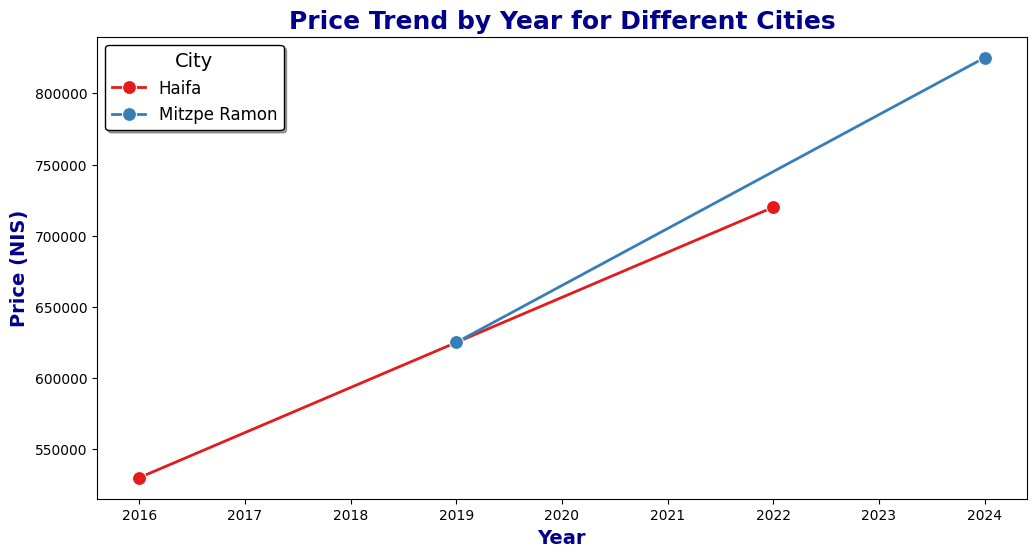

In [57]:
#Creating a graph that illustrates the price increase:
plt.figure(figsize=(12, 6))
#Use circular markers, apply the 'Set1' color palette for different lines, and set the marker size to 10 for better visibility:
sb.lineplot(data=price_increase, x='Year', y='Price', hue='CityName', marker='o', linewidth=2, palette='Set1', markersize=10)

#Designing axes and titles:
plt.title("Price Trend by Year for Different Cities", fontsize=18, weight='bold', color='darkblue')
plt.xlabel("Year", fontsize=14, weight='bold', color='darkblue')
plt.ylabel("Price (NIS)", fontsize=14, weight='bold', color='darkblue')

#Legend design:
plt.legend(title='City', loc='upper left', fontsize=12, title_fontsize=14, shadow=True, frameon=True, edgecolor='black')

plt.show()


In [58]:
#The 5 most expensive cities to buy an apartment in:

In [59]:
Cities.sort_values("AveragePurchasePrice", ascending = False).head()

,CityID,CityName,Region,SocioEconomicIndex,TotalPopulation,AveragePurchasePrice,AverageRentalPrice,AnnualReturn
9,10,Ramat Hasharon,Tel Aviv,9,48795,"4,658,372.00","9,500.00",2.24
0,1,Tel Aviv,Tel Aviv,8,494561,"4,580,456.00","9,300.00",2.23
12,13,Raanana,Center,8,83616,"3,455,373.00","7,750.00",2.47
8,9,Herzliya,Tel Aviv,8,109296,"3,454,284.00","8,900.00",2.71
11,12,Hod Hasharon,Center,8,66208,"3,428,493.00","8,000.00",2.57


In [60]:
#The 5 most expensive cities to rent an apartment in:

In [61]:
Cities.sort_values("AverageRentalPrice", ascending = False).head()

,CityID,CityName,Region,SocioEconomicIndex,TotalPopulation,AveragePurchasePrice,AverageRentalPrice,AnnualReturn
9,10,Ramat Hasharon,Tel Aviv,9,48795,"4,658,372.00","9,500.00",2.24
0,1,Tel Aviv,Tel Aviv,8,494561,"4,580,456.00","9,300.00",2.23
8,9,Herzliya,Tel Aviv,8,109296,"3,454,284.00","8,900.00",2.71
11,12,Hod Hasharon,Center,8,66208,"3,428,493.00","8,000.00",2.57
12,13,Raanana,Center,8,83616,"3,455,373.00","7,750.00",2.47


In [62]:
#Join of Customers table to tran_propdet:

In [63]:
cust_tran_propdet = pd.merge(Customers, tran_propdet, on = "CustomerID")

In [64]:
cust_tran_propdet.head()

,CustomerID,FirstName,LastName,BirthDate,Gender,Profession,Residence,Religion,TransactionID,PropertyID,CityName,TransactionDate,Price,Address,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
0,1,David,Levi,1980-05-12,Male,Engineer,Tel Aviv,Jewish,13,38,Tel Aviv,2024-07-18,"3,200,000.00",Dizengoff 249,Apartment,2,2,47,2023
1,1,David,Levi,1980-05-12,Male,Engineer,Tel Aviv,Jewish,15,10,Hod Hasharon,2022-06-23,"7,150,000.00",Akalton 18,Private,0,6,230,1991
2,1,David,Levi,1980-05-12,Male,Engineer,Tel Aviv,Jewish,37,8,Or Akiva,2022-10-25,"6,300,000.00",Havered 1,Apartment,9,5,173,2023
3,2,Maya,Cohen,1985-03-22,Female,Teacher,Haifa,Jewish,40,21,Tiberias,2024-09-26,"899,000.00",Brener 121,Apartment,1,4,110,1970
4,3,Yossi,Mizrahi,1975-11-05,Male,Doctor,Jerusalem,Jewish,19,22,Caesarea,2024-01-15,"5,150,000.00",Livne 4,Private,0,4,139,1996


In [65]:
#Displaying the customer's details and the details of the property he purchased:

In [66]:
customers_propertydetails = cust_tran_propdet[["CustomerID", "FirstName", "LastName", "Gender", "Profession", "PropertyID", "CityName", "Price", "Type", "Floor","NumberOfRooms", "SquareMeter", "YearOfConstruction"]]

In [67]:
customers_propertydetails.head()

,CustomerID,FirstName,LastName,Gender,Profession,PropertyID,CityName,Price,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
0,1,David,Levi,Male,Engineer,38,Tel Aviv,"3,200,000.00",Apartment,2,2,47,2023
1,1,David,Levi,Male,Engineer,10,Hod Hasharon,"7,150,000.00",Private,0,6,230,1991
2,1,David,Levi,Male,Engineer,8,Or Akiva,"6,300,000.00",Apartment,9,5,173,2023
3,2,Maya,Cohen,Female,Teacher,21,Tiberias,"899,000.00",Apartment,1,4,110,1970
4,3,Yossi,Mizrahi,Male,Doctor,22,Caesarea,"5,150,000.00",Private,0,4,139,1996


In [68]:
#Average transaction price calculation by property type:

In [69]:
avg_price = customers_propertydetails.groupby("Type")["Price"].mean()

In [70]:
avg_price

Type
Apartment   2,030,437.50
Private     4,072,500.00
Name: Price, dtype: float64

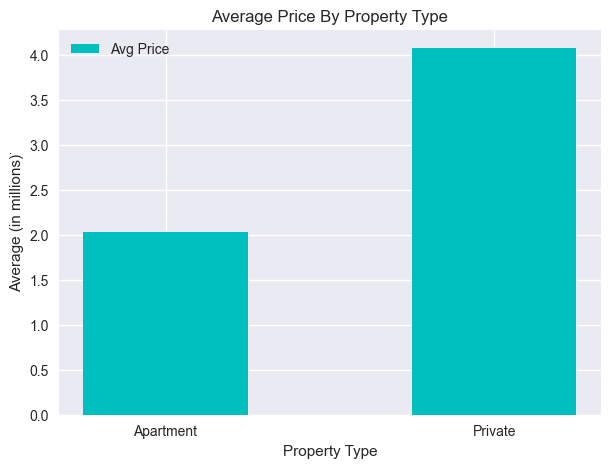

In [71]:
plt.figure(figsize=(7,5))
plt.style.use('seaborn-v0_8')
plt.bar(avg_price.index, avg_price / 1e6 , color="c", label="Avg Price", width=0.5)
plt.title("Average Price By Property Type")
plt.ylabel("Average (in millionsׁׁ)")
plt.xlabel("Property Type")
plt.legend()
plt.show()

In [72]:
#Are there customers who own more than one property?

In [73]:
customers_counts = customers_propertydetails.value_counts("CustomerID")

In [74]:
customers_counts

CustomerID
1     3
14    3
4     2
3     2
10    2
11    2
9     2
12    2
20    2
27    2
8     1
2     1
5     1
6     1
7     1
15    1
16    1
17    1
18    1
13    1
19    1
21    1
23    1
22    1
24    1
25    1
26    1
28    1
Name: count, dtype: int64

In [75]:
customers_with_multiple_properties = customers_counts[customers_counts > 1].index

In [76]:
#Displaying the CustomerID of customers with more than one property:

In [77]:
customers_with_multiple_properties

Index([1, 14, 4, 3, 10, 11, 9, 12, 20, 27], dtype='int64', name='CustomerID')

In [78]:
len(customers_with_multiple_properties)

10

In [79]:
#Display of these customer details from a customers_propertydetails table:

In [80]:
Top10_customers = Customers[Customers['CustomerID'].isin(customers_with_multiple_properties)]

In [81]:
Top10_customers

,CustomerID,FirstName,LastName,BirthDate,Gender,Profession,Residence,Religion
0,1,David,Levi,1980-05-12,Male,Engineer,Tel Aviv,Jewish
2,3,Yossi,Mizrahi,1975-11-05,Male,Doctor,Jerusalem,Jewish
3,4,Itamar,Goldberg,1983-08-14,Male,Lawyer,Rishon LeZion,Jewish
8,9,Dafna,Mandel,1983-07-23,Female,Professor,Herzliya,Jewish
9,10,Oren,Pereira,1978-02-05,Male,Engineer,Kiryat Shmona,Jewish
10,11,Erez,Ben David,1986-09-30,Male,Writer,Kfar Saba,Jewish
11,12,Tamar,Saul,1992-10-01,Female,Actor,Raanana,Jewish
13,14,Jonathan,Moyal,1993-11-20,Male,Businessman,Jerusalem,Jewish
19,20,Ahmad,Jaber,1973-12-30,Male,Businessman,Jaffa,Muslim
26,27,Samir,Jadallah,1986-03-18,Male,Engineer,Haifa,Christian


In [82]:
mask = Top10_customers.value_counts("Profession")

In [83]:
mask

Profession
Engineer       3
Businessman    2
Actor          1
Doctor         1
Lawyer         1
Professor      1
Writer         1
Name: count, dtype: int64

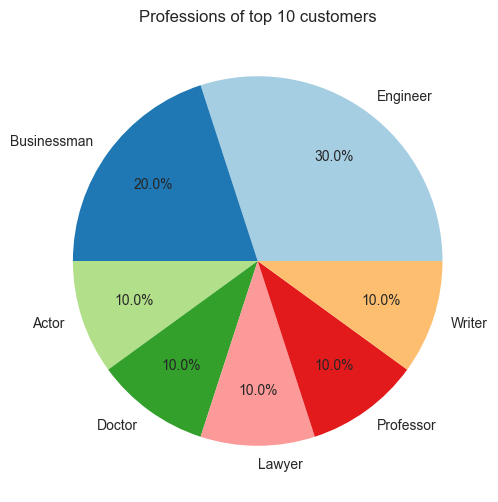

In [84]:
#Creating a pie graph to represent the professions of the top 10 customers:

colors = plt.cm.Paired(range(len(mask))) #Assign different and distinct colors to each profession.
plt.figure(figsize=(8,6))
plt.style.use('seaborn-v0_8')
plt.pie(mask, labels=mask.index, colors=colors, autopct='%1.1f%%', pctdistance=0.7)
plt.title("Professions of top 10 customers")
plt.show()

In [85]:
#Display of all their transactions:

In [86]:
the_10_customers_transactions = customers_propertydetails[customers_propertydetails['CustomerID'].isin(customers_with_multiple_properties)]

In [87]:
the_10_customers_transactions

,CustomerID,FirstName,LastName,Gender,Profession,PropertyID,CityName,Price,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
0,1,David,Levi,Male,Engineer,38,Tel Aviv,"3,200,000.00",Apartment,2,2,47,2023
1,1,David,Levi,Male,Engineer,10,Hod Hasharon,"7,150,000.00",Private,0,6,230,1991
2,1,David,Levi,Male,Engineer,8,Or Akiva,"6,300,000.00",Apartment,9,5,173,2023
4,3,Yossi,Mizrahi,Male,Doctor,22,Caesarea,"5,150,000.00",Private,0,4,139,1996
5,3,Yossi,Mizrahi,Male,Doctor,4,Jerusalem,"1,790,000.00",Apartment,0,3,49,1989
6,4,Itamar,Goldberg,Male,Lawyer,40,Beer Sheva,"825,000.00",Apartment,1,3,57,1995
7,4,Itamar,Goldberg,Male,Lawyer,20,Rishon LeZion,"1,960,000.00",Apartment,8,3,63,1970
12,9,Dafna,Mandel,Female,Professor,16,Herzliya,"3,170,000.00",Apartment,1,4,92,2001
13,9,Dafna,Mandel,Female,Professor,28,Hod Hasharon,"2,400,000.00",Private,0,3,60,1970
14,10,Oren,Pereira,Male,Engineer,29,Kiryat Shmona,"450,000.00",Apartment,2,3,64,1998


In [88]:
#Gender distribution among the ten customers:

In [89]:
Customers[Customers['CustomerID'].isin(customers_with_multiple_properties)].value_counts("Gender")

Gender
Male      8
Female    2
Name: count, dtype: int64

In [90]:
#The sum of the transaction prices of each of the customers:

In [91]:
plot1 = the_10_customers_transactions.groupby(["CustomerID", "FirstName"])["Price"].sum().to_frame().reset_index()

In [92]:
plot1

,CustomerID,FirstName,Price
0,1,David,"16,650,000.00"
1,3,Yossi,"6,940,000.00"
2,4,Itamar,"2,785,000.00"
3,9,Dafna,"5,570,000.00"
4,10,Oren,"1,130,000.00"
5,11,Erez,"3,150,000.00"
6,12,Tamar,"7,800,000.00"
7,14,Jonathan,"8,050,000.00"
8,20,Ahmad,"7,740,000.00"
9,27,Samir,"3,370,000.00"


In [93]:
 #Conversion to units of millions:
plot1['Price'] = plot1['Price'] / 1000000

#Sort the amounts in descending order:
plot1 = plot1.sort_values(by="Price") 

<Figure size 1000x600 with 0 Axes>

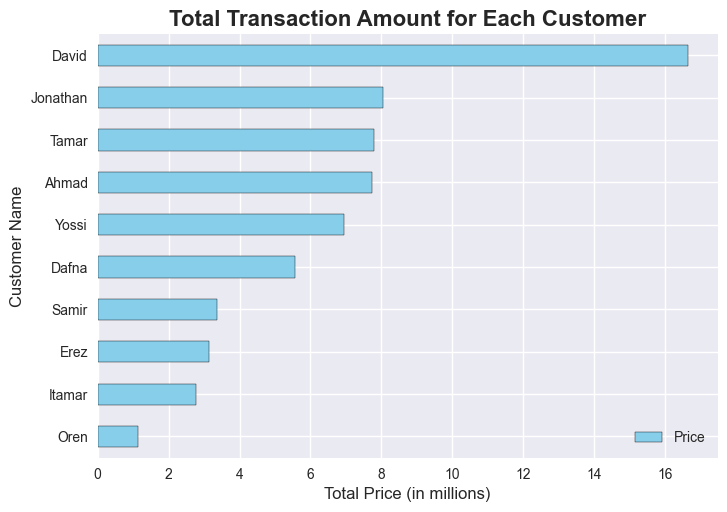

In [94]:
plt.figure(figsize=(10, 6))
plot1.plot(kind="barh", x="FirstName", y="Price", color='skyblue', edgecolor='black')
plt.title("Total Transaction Amount for Each Customer", fontsize=16, weight='bold')
plt.ylabel("Customer Name", fontsize=12)
plt.xlabel("Total Price (in millions)", fontsize=12)
plt.show()

In [95]:
#Display of the 15 most expensive transactions among the transactions of those customers:

In [96]:
the_10_customers_transactions.sort_values("Price", ascending = False).head(15)

,CustomerID,FirstName,LastName,Gender,Profession,PropertyID,CityName,Price,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
1,1,David,Levi,Male,Engineer,10,Hod Hasharon,"7,150,000.00",Private,0,6,230,1991
2,1,David,Levi,Male,Engineer,8,Or Akiva,"6,300,000.00",Apartment,9,5,173,2023
4,3,Yossi,Mizrahi,Male,Doctor,22,Caesarea,"5,150,000.00",Private,0,4,139,1996
18,12,Tamar,Saul,Female,Actor,3,Ramat Hasharon,"4,000,000.00",Apartment,1,4,98,2007
30,20,Ahmad,Jaber,Male,Businessman,14,Tel Aviv,"3,990,000.00",Apartment,23,3,72,2024
19,12,Tamar,Saul,Female,Actor,34,Raanana,"3,800,000.00",Private,0,4,120,1981
29,20,Ahmad,Jaber,Male,Businessman,1,Kfar Saba,"3,750,000.00",Apartment,4,5,125,2021
21,14,Jonathan,Moyal,Male,Businessman,25,Raanana,"3,230,000.00",Apartment,4,4,94,2021
0,1,David,Levi,Male,Engineer,38,Tel Aviv,"3,200,000.00",Apartment,2,2,47,2023
12,9,Dafna,Mandel,Female,Professor,16,Herzliya,"3,170,000.00",Apartment,1,4,92,2001


In [97]:
#Of the 15 transactions - division by professions:

In [98]:
the_10_customers_transactions.sort_values("Price", ascending = False).head(15).value_counts("Profession")

Profession
Businessman    5
Engineer       4
Actor          2
Professor      2
Doctor         1
Writer         1
Name: count, dtype: int64

In [99]:
#Join of Cities table to tran_propdet:

In [100]:
city_tran_propdet = pd.merge(Cities, tran_propdet, on = "CityName")

In [101]:
city_tran_propdet.head()

,CityID,CityName,Region,SocioEconomicIndex,TotalPopulation,AveragePurchasePrice,AverageRentalPrice,AnnualReturn,TransactionID,CustomerID,PropertyID,TransactionDate,Price,Address,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
0,1,Tel Aviv,Tel Aviv,8,494561,"4,580,456.00","9,300.00",2.23,13,1,38,2024-07-18,"3,200,000.00",Dizengoff 249,Apartment,2,2,47,2023
1,1,Tel Aviv,Tel Aviv,8,494561,"4,580,456.00","9,300.00",2.23,30,20,14,2024-11-06,"3,990,000.00",Hasolelim 1,Apartment,23,3,72,2024
2,2,Haifa,Haifa,7,295781,"1,474,634.00","3,800.00",2.83,1,27,36,2022-07-10,"720,000.00",Hachshmal 53,Apartment,2,3,54,1950
3,2,Haifa,Haifa,7,295781,"1,474,634.00","3,800.00",2.83,20,21,30,2016-11-28,"530,000.00",Hachshmal 53,Apartment,0,3,53,1962
4,3,Jerusalem,Jerusalem,4,1039481,"2,715,856.00","6,000.00",2.43,21,3,4,2024-08-15,"1,790,000.00",Hatzabar 215,Apartment,0,3,49,1989


In [102]:
#Use of columns that may affect the transaction price:
city_tran_propdet = city_tran_propdet[["CityName", "SocioEconomicIndex", "Price", "Address", "Type", "Floor", "NumberOfRooms", "SquareMeter", "YearOfConstruction"]]

In [103]:
city_tran_propdet.head()

,CityName,SocioEconomicIndex,Price,Address,Type,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
0,Tel Aviv,8,"3,200,000.00",Dizengoff 249,Apartment,2,2,47,2023
1,Tel Aviv,8,"3,990,000.00",Hasolelim 1,Apartment,23,3,72,2024
2,Haifa,7,"720,000.00",Hachshmal 53,Apartment,2,3,54,1950
3,Haifa,7,"530,000.00",Hachshmal 53,Apartment,0,3,53,1962
4,Jerusalem,4,"1,790,000.00",Hatzabar 215,Apartment,0,3,49,1989


In [104]:
#Creating of correlation table:
correlation_matrix = city_tran_propdet.select_dtypes(include=['number']).corr().abs()

In [105]:
correlation_matrix 

,SocioEconomicIndex,Price,Floor,NumberOfRooms,SquareMeter,YearOfConstruction
SocioEconomicIndex,1.00,0.50,0.03,0.08,0.07,0.19
Price,0.50,1.00,0.11,0.50,0.48,0.35
Floor,0.03,0.11,1.00,0.13,0.10,0.30
NumberOfRooms,0.08,0.50,0.13,1.00,0.71,0.18
SquareMeter,0.07,0.48,0.10,0.71,1.00,0.13
YearOfConstruction,0.19,0.35,0.30,0.18,0.13,1.00


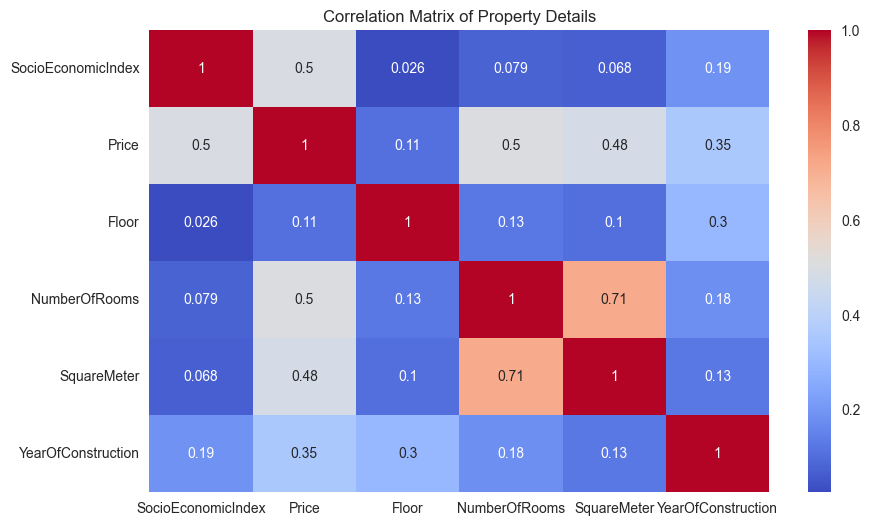

In [106]:
#Creating heatmap of correlation_matrix:
plt.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Property Details")
plt.show()

In [107]:
#Checking the correlation of the price with the other values:
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)

In [108]:
correlation_with_price = correlation_with_price[["NumberOfRooms", "SocioEconomicIndex", "SquareMeter", "YearOfConstruction", "Floor"]].sort_values()

In [109]:
correlation_with_price

Floor                0.11
YearOfConstruction   0.35
SquareMeter          0.48
SocioEconomicIndex   0.50
NumberOfRooms        0.50
Name: Price, dtype: float64

C:\Users\Alon\AppData\Local\Temp\ipykernel_14868\2335381585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette = "magma")


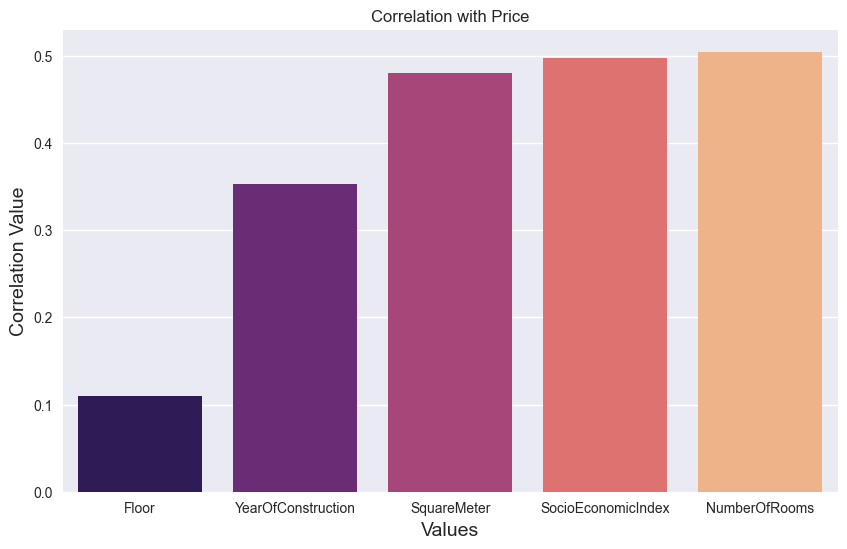

In [110]:
#Creating a bar plot that displays the data:
plt.figure(figsize=(10, 6))
sb.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette = "magma")
plt.title("Correlation with Price")
plt.xlabel("Values", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

# FINAL PART - SUMMARY and CONCLUSIONS:
Based on my analysis, these are the main conclusions:

### 1. Which of the property's properties most affect its price?
The three factors that most influence the price of a property are Number of Rooms, Socio-Economic Index, and Square Meters. These factors show moderate correlation with price.
Private properties tend to be more expensive than apartments, and high-floor apartments in new buildings tend to fetch higher prices.
Although several factors affect the price, there is no one significant factor that can be isolated as the most influential.

### 2. What are the five cities where real estate prices are the highest? And is there a connection to their socioeconomic ranking?
The five cities with the highest property prices are Ramat Hasharon, Hod Hasharon, Or Akiva, Caesarea, and Tel Aviv.
There is a clear connection between these cities' high real estate prices and their socioeconomic ranking. Cities like Ramat Hasharon and Hod Hasharon also appear frequently in the top 10, further strengthening this correlation.
On the other hand, the cities with the lowest property prices are Kiryat Shmona, Haifa, Mitzpe Ramon, Karmiel, and Beer Sheva, which are less affluent.

### 3. How have prices changed over the years?
Prices have increased over time in certain cities, such as Haifa and Mitzpe Ramon.
In Haifa, an apartment bought for 530,000 NIS in 2016 increased to 720,000 NIS in 2022 (a 35.85% increase over 6 years).
In Mitzpe Ramon, an apartment bought for 625,000 NIS in 2019 rose to 825,000 NIS in 2024 (a 32.00% increase over 5 years).

### 4. Consumer behavior - Is there a connection between the profession of the customer and the city where he purchases a property?
Based on the data, most of the transactions occurred in the second half of the year, with a significant concentration in October and November.
Typically, many real estate transactions occur in June, July, and August, as families take advantage of the summer break to move. Most of my data is from 2024, following the end of 2023 and the start of the war. This likely explains why most transactions in 2024 happened later in the year, as the market needed time to recover and return to a more stable state.

There are 10 customers who own more than one property.  Among them, 3 are engineers and 2 are businessmen.
These professions might indicate individuals with higher disposable income, allowing them to afford multiple properties.
The customer David, for example, has purchased properties worth a total of 16,650,000 NIS.

### 5. Investment analysis - Is there a significant difference in the annual return percentages in certain cities?
The cities with the highest return on investment based on price growth are Haifa and Mitzpe Ramon, where prices have seen a significant increase over time.
The annual return rates range from a minimum of 1.98% to a maximum of 3.29%, meaning the differences are not substantial.
The top five cities with the highest annual returns are Tiberias, Mitzpe Ramon, Ashdod, Haifa, and Or Akiva. Of these, only two cities have returns exceeding 3%. Kiryat Shmona is the only city with an annual return lower than 2%.

### Additional Insights:

High Price Outliers: Exceptional cases, such as an apartment in Or Akiva (purchased for a high price) and in Tel Aviv (with very high floors and new construction), indicate that factors like high-floor apartments and new construction influence the price significantly.

There is a direct connection between the socioeconomic index and the rental prices.

Low to Moderate Correlations: The correlations between various factors and price are generally low to moderate, with the highest correlation observed between Number of Rooms and Property Size.

The number of rooms and the size of the property are among the top three factors that influence the price of real estate transactions.
In conclusion, property size, number of rooms, socioeconomic index, and location in affluent cities like Ramat Hasharon, Tel Aviv, and Caesarea are key factors driving price trends. These factors are also associated with higher socioeconomic rankings in these cities. Additionally, high-floor apartments in new buildings tend to have higher prices, indicating the impact of property features on real estate values.

It was important for me to use the database I created, which is why some analyses may lack sufficient data to draw deep conclusions. However, I prioritized using the data I imported myself, as it was of personal interest to me.